# PageRank 실습
### 이번 실습 시간에는 PageRank 기법을 이용한 실습을 진행할 예정


## 1.1 데이터 다운로드에 사용할 package 불러오기
- 오늘 실습에서는 데이터 다운로드에 python의 requests 패키지를 사용할 예정
- request package는 python에서 HTTP 요청을 간단하게 보낼 수 있도록 도와주는 라이브러리


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import requests

# 1.2 WebDataCommons Hyperlink Graph
##- WebDataCommons (WDC) Hyperlink Graph: 전 세계 웹을 그래프 형태로 표현한, 가장 대규모의 공개 웹 그래프 데이터셋 중 하나
##- 웹페이지 간의 하이퍼링크만 추출해 만든 데이터셋
##- <font color=red>정점(Node)</font>: 웹 페이지, <font color=red>간선(Edge)</font>: 하이퍼링크
##- 원래 기본 데이터셋은 노드 수: 30~40억 페이지 이상, 엣지 수: 약 10조 이상이지만 우리가 실습 시간에는 이 데이터셋의 축소 버전을 사용할 예정
##- example_index: 노드 정보
##- example_arc: 에지 정보

In [ ]:
with open("example_index", "wb") as f:
  r = requests.get("http://webdatacommons.org/hyperlinkgraph/data/example_index")
  f.write(r.content)

with open("example_arcs", "wb") as f:
  r = requests.get("http://webdatacommons.org/hyperlinkgraph/data/example_arcs")
  f.write(r.content)


#1.3 다운 받은 데이터를 이용해 하이퍼링크 그래프 불러오기

In [ ]:
nodes = np.loadtxt("example_index", dtype=object)[:,0]
num_nodes = nodes.shape[0]

edges = np.loadtxt("example_arcs", dtype=int)
num_edges = edges.shape[0]

In [ ]:
print(num_nodes)
print(num_edges)

106
141


# 1.4 데이터 살펴보기
## - python의 networkx package를 통해 데이터를 visualize 및 분석 해볼 수 있음
## - networkx package는 graph data형태를 다루는데 사용하는 python library
## - draw()함수를 통해 시각적으로 보는 것도 가능하고 degree_histogram()함수를 통해서 차수 분포(degree distribution)등도 분석 가능

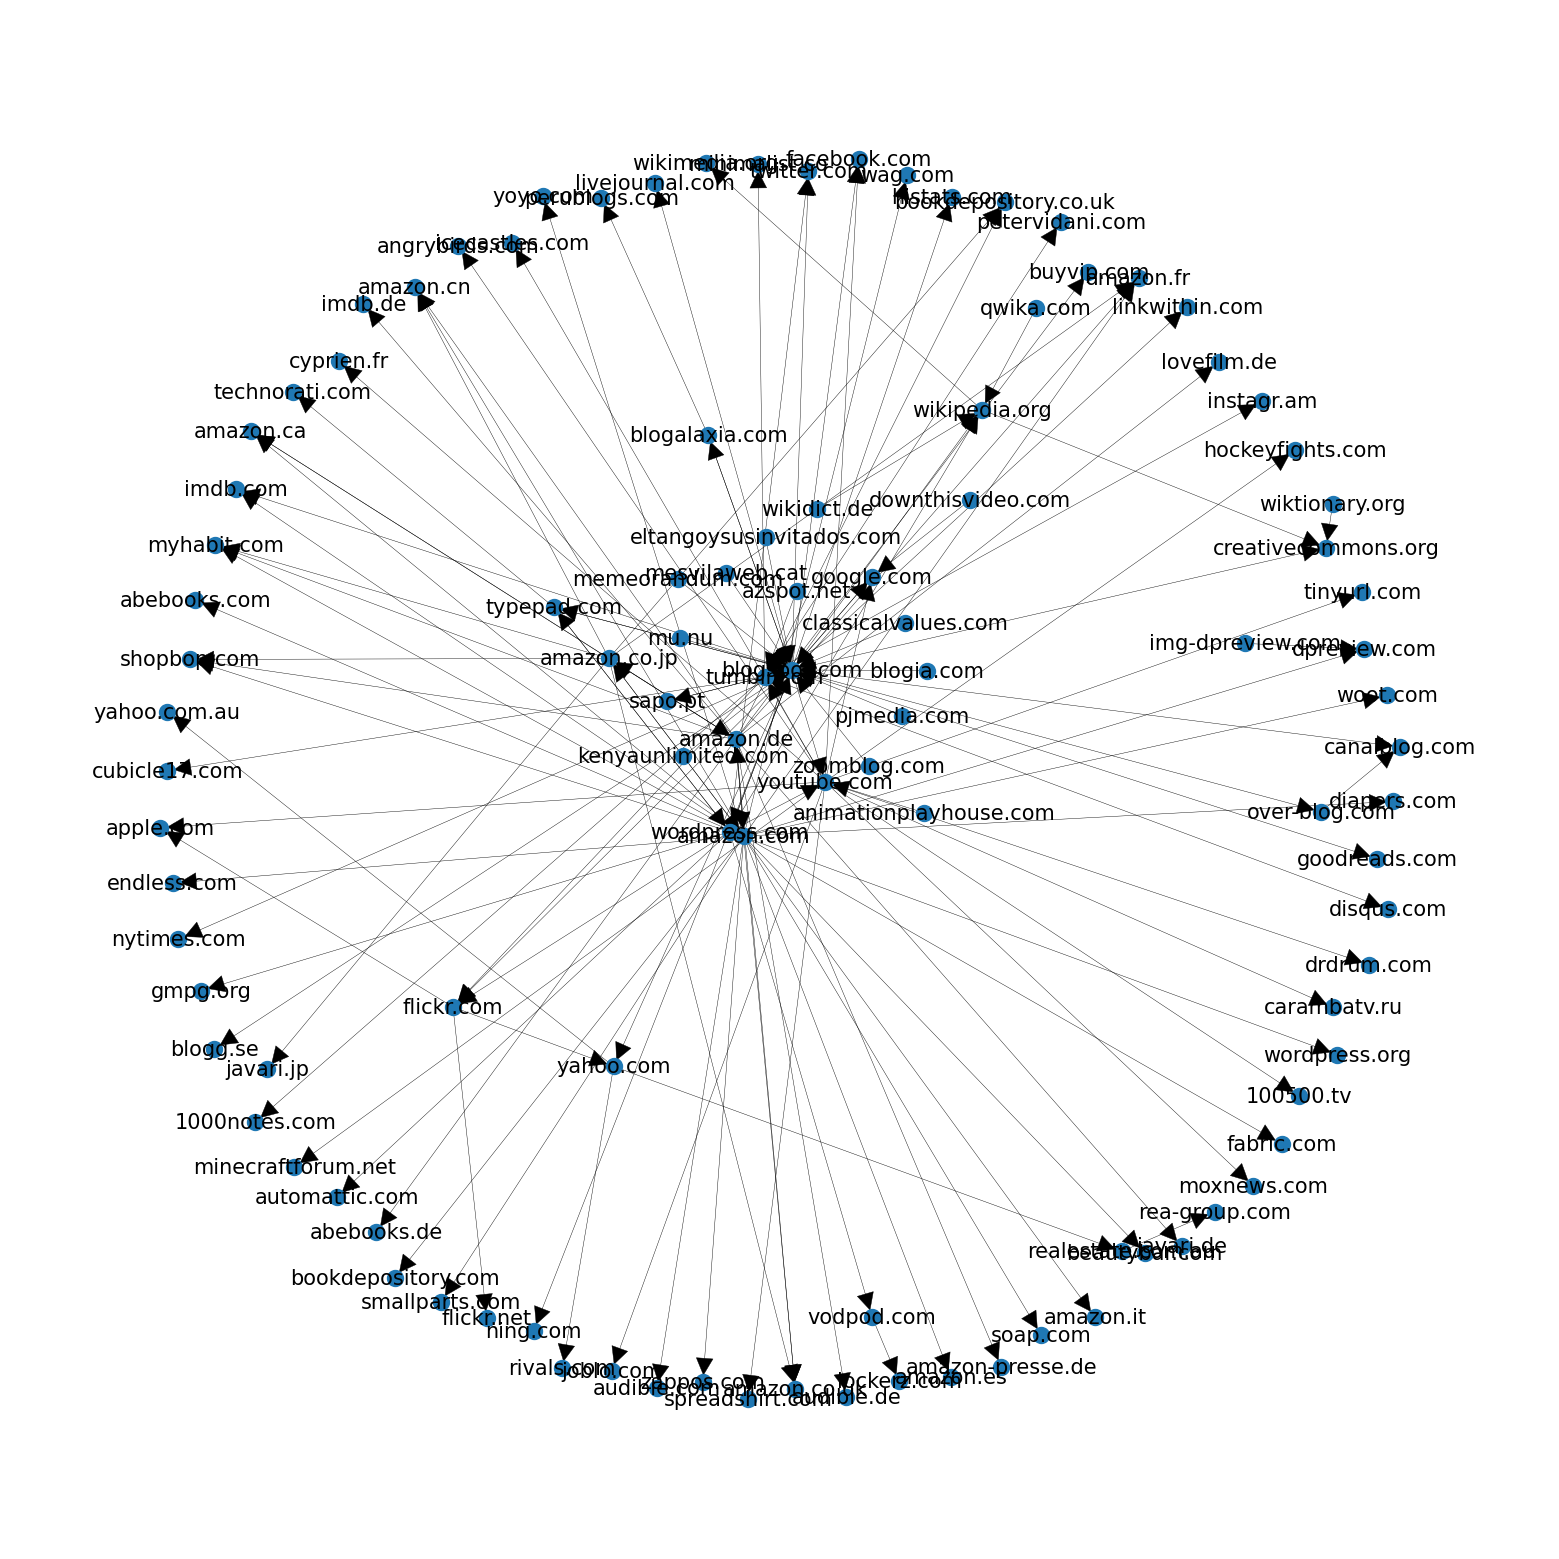

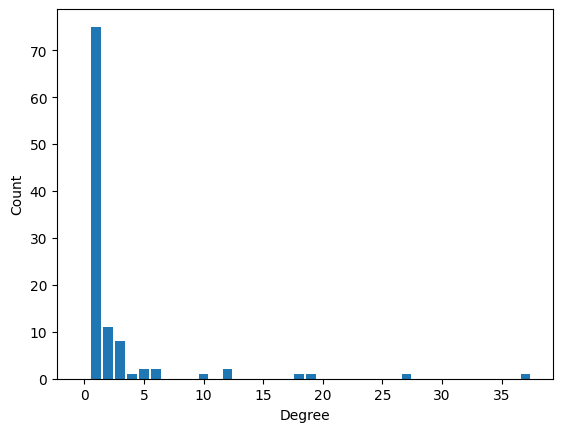

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5),dpi=300)
G = nx.DiGraph()

for e in edges:
  G.add_edge(nodes[e[0]], nodes[e[1]])

pos = nx.spring_layout(G, k=1, iterations=200)
nx.draw(G, pos, with_labels=True, node_size=10, font_size=5, width=0.1)
plt.show()

degree_hist = nx.degree_histogram(G)
plt.bar(range(len(degree_hist)), degree_hist)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()


# 1.5 Google Matrix
## - Google Matrix는 Dense 함 => 연산이 과도하게 많음
##$A=\beta M+(1-\beta)\begin{bmatrix}\frac{1}{N}\end{bmatrix}_{N\times N}$
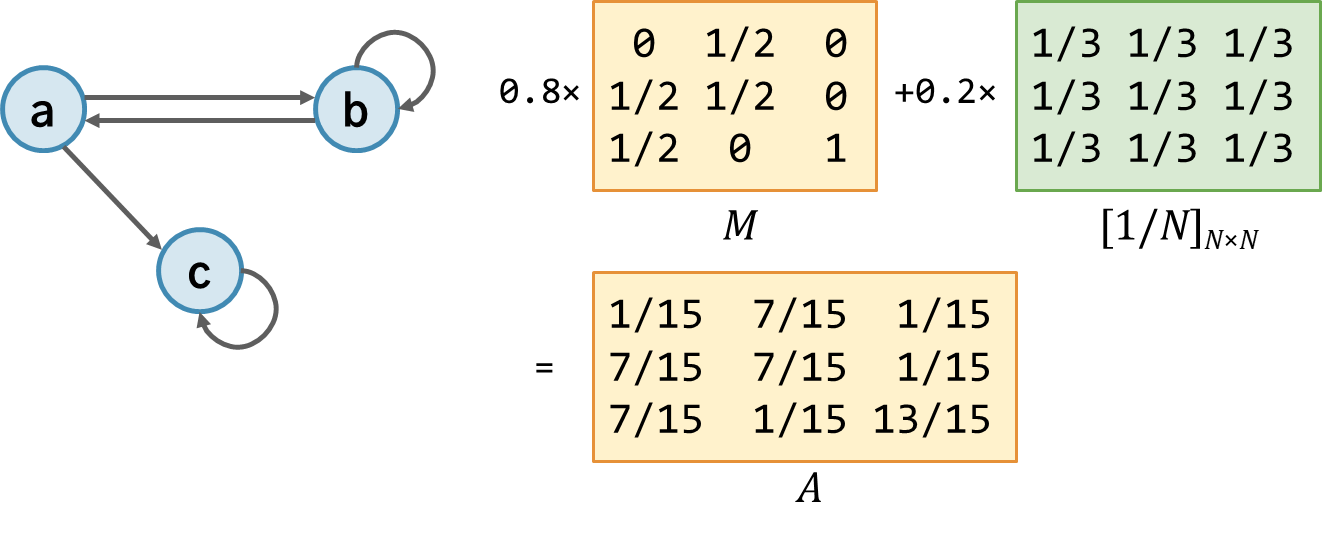
## - 보다 효율적인 구현 방법
### - 각 엣지마다, 시작 노드의 점수를 끝 노드 점수에 합산
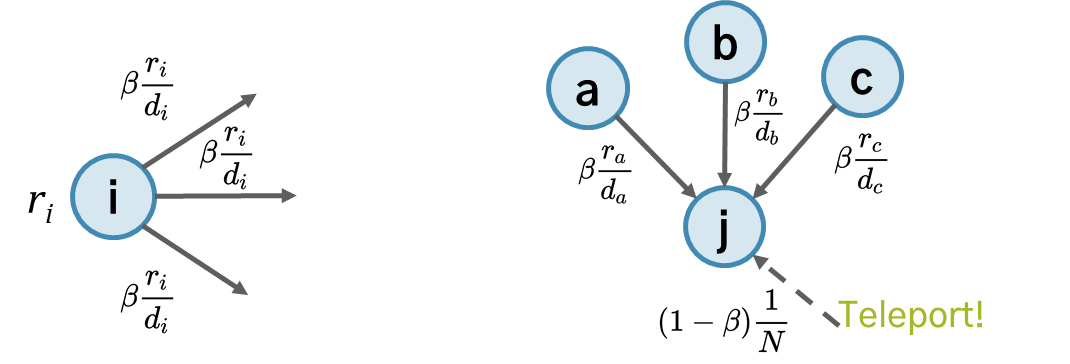

In [ ]:
def pagerank(edges, n_nodes, beta=0.85, epoch=100):
  r = [1/n_nodes] * n_nodes
  d = [0] * n_nodes
  for u, _ in edges:
    d[u] += 1

  teleport = (1-beta) / n_nodes

  for _ in range(epoch):

    r_next = [teleport] * n_nodes
    for u, v in edges:
      r_next[v] += beta * r[u]/d[u] # 각 edge의 시작점의 점수를 degree로 나눈 값에 beta를 곱한 값을 끝점의 점수에 더해준다

    r_sum = sum(r_next)
    for u in range(n_nodes):
      r_next[u] += (1-r_sum) / n_nodes # 업데이트하고 난 뒤 부족한 값을 각 노드들에 골고루 나눠줌

    r = r_next
  return r

# 1.6 PageRank 함수를 통해 각 노드의 중요도 측정
## - 위에서 정의해 놓은 edges와 num_nodes를 입력값으로 주어 분석

In [ ]:
r = pagerank(edges, num_nodes, 0.85)
for score, node in sorted(zip(r, nodes), reverse=True)[:10]:
  print(f"({score:.6f}) {node}")

(0.085426) blogspot.com
(0.024220) creativecommons.org
(0.021582) wikipedia.org
(0.017731) canalblog.com
(0.016119) youtube.com
(0.015904) tumblr.com
(0.015904) google.com
(0.015600) wikimedia.org
(0.015058) rea-group.com
(0.013151) yahoo.com


# 2.1 NetworkX package를 이용한 PageRank 계산
## - networkx package에는 pagerank() 함수가 내장되어 있어 바로 사용 가능

In [ ]:
r = nx.pagerank(G, 0.85)

for pair in sorted(r.items(), key=lambda x: -x[1])[:10]:
  print(pair)

('blogspot.com', 0.08542425762544206)
('creativecommons.org', 0.024220103814991234)
('wikipedia.org', 0.021582586522641486)
('canalblog.com', 0.017730661911958275)
('youtube.com', 0.016119265401656313)
('tumblr.com', 0.015904254686443048)
('google.com', 0.015904254686443048)
('wikimedia.org', 0.015599528017970031)
('rea-group.com', 0.015057970139281873)
('yahoo.com', 0.013150763969634)
